# purity of $CC1p$ in the selected events-sample

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/Xsec/Figures/background_subtraction/'

In [5]:
versions['overlay date'] = '2018_08_16'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
versions['data date'] = '2018_08_16'
versions['beam on'] = 'prod_reco_optfilter_bnb_v12_unblind_mcc8'
versions['beam off'] = 'prod_reco_optfilter_extbnb_v12_mcc8_dev'
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data()

found selected_cosmic.csv, loading it...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_on_beam.csv and found the file...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_08_16_selected_genie_CC1p.csv and found the file...
8211 selected CC1p events overlay


## break up different background types

In [7]:
Nnormed,Nnormed_err = dict(),dict()
for pair_type in pair_types:
    Nnormed[pair_type] = float(len(selected_overlay[pair_type])*Nevents['f(POT)'])
    Nnormed_err[pair_type] = np.sqrt(len(selected_overlay[pair_type]))*Nevents['f(POT)']
    print '%.1f +/- %.1f'%(Nnormed[pair_type],Nnormed_err[pair_type]),pair_type,'after POT normalization'    
print_line()
Nnormed['off beam'] = (len(selected_beam_off)*OffBeam_scaling)
Nnormed_err['off beam'] = np.sqrt(len(selected_beam_off))*OffBeam_scaling
print '%.1f +/- %.1f'%(Nnormed['off beam'],Nnormed_err['off beam']),pair_type,'off-beam in on-beam equivalent'

Nnormed['on beam'] = len(selected_beam_on)
Nnormed_err['on beam'] = np.sqrt(len(selected_beam_on))
print '%.1f +/- %.1f'%(Nnormed['on beam'],Nnormed_err['on beam']),pair_type,'on-beam events'

496.2 +/- 5.0 1mu-1p after POT normalization
7.7 +/- 0.6 other pairs after POT normalization
3.2 +/- 0.4 cosmic after POT normalization
409.4 +/- 4.6 CC1p0pi after POT normalization
420.8 +/- 4.6 CC1p after POT normalization
--------------------------------------------------------------
7.8 +/- 2.3 CC1p off-beam in on-beam equivalent
355.0 +/- 18.8 CC1p on-beam events


In [9]:
Nnormed['1mu-1p bkg'] = Nnormed['1mu-1p'] - Nnormed['CC1p']
Nnormed_err['1mu-1p bkg'] = np.sqrt(Nnormed['1mu-1p'] - Nnormed['CC1p'])
Nnormed['other pairs bkg'] = Nnormed['other pairs']
Nnormed_err['other pairs bkg'] = np.sqrt(Nnormed['other pairs'])
Nnormed['beam bkg'] = Nnormed['1mu-1p bkg'] + Nnormed['other pairs bkg']
Nnormed_err['beam bkg'] = np.sqrt( np.square(Nnormed_err['1mu-1p bkg']) + np.square(Nnormed_err['other pairs bkg']) )
Nnormed['background'] = Nnormed['beam bkg'] + Nnormed['off beam']
Nnormed_err['background'] = np.sqrt( np.square(Nnormed_err['beam bkg']) + np.square(Nnormed_err['off beam']) )
Nnormed['signal'] = Nnormed['on beam']
Nnormed_err['signal'] = Nnormed_err['on beam']

In [10]:
absolute_N_B = Nnormed['signal'] - Nnormed['background']
absolute_N_B_err = np.sqrt(np.square(Nnormed_err['signal']) + np.square(Nnormed_err['background']))
print 'absolute background subtracted beam-on: %.4f +/- %.4f'%(absolute_N_B,absolute_N_B_err)
np.savetxt(Paths['background maps'] + "beam_on_bkg_sbtrctd.csv", [absolute_N_B,absolute_N_B_err], delimiter=",")
print 'saved into',Paths['background maps'] + "beam_on_bkg_sbtrctd.csv"

mc_N_B = Nnormed['CC1p']
mc_N_B_err = Nnormed_err['CC1p']
print 'absolute CC1p in mc: %.4f +/- %.4f'%(mc_N_B,mc_N_B_err)
np.savetxt(Paths['background maps'] + "mc_cc1p.csv", [mc_N_B,mc_N_B_err], delimiter=",")
print 'saved into',Paths['background maps'] + "mc_cc1p.csv"

absolute background subtracted beam-on: 264.0614 +/- 21.0632
saved into /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/background_maps/beam_on_bkg_sbtrctd.csv
absolute CC1p in mc: 420.7657 +/- 4.6435
saved into /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/background_maps/mc_cc1p.csv


## Background subtraction

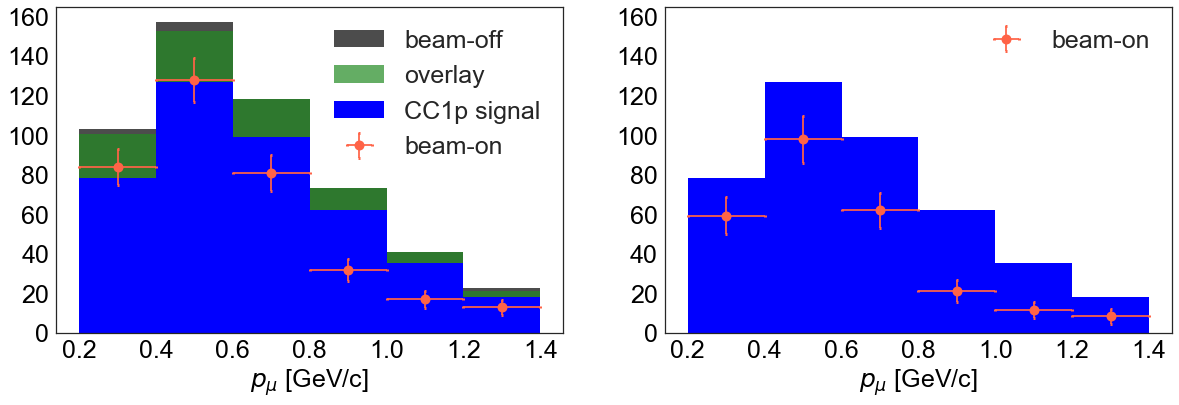

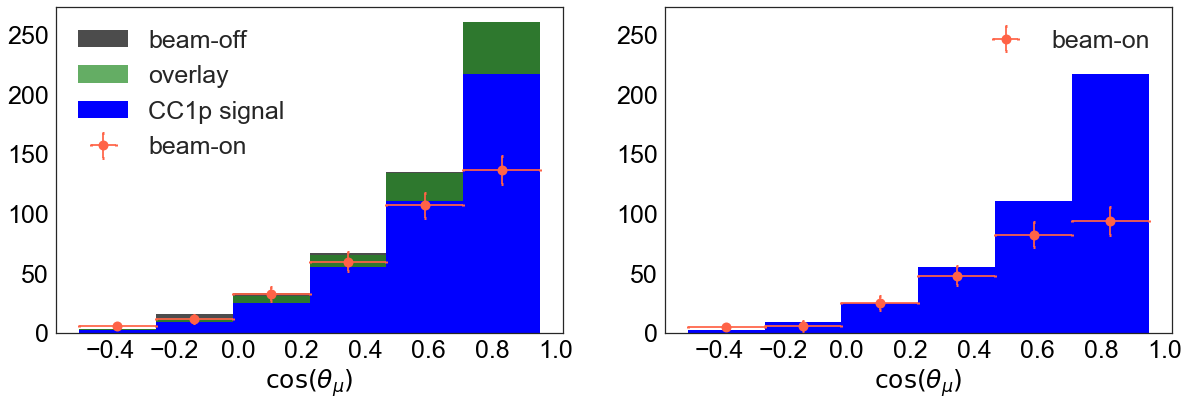

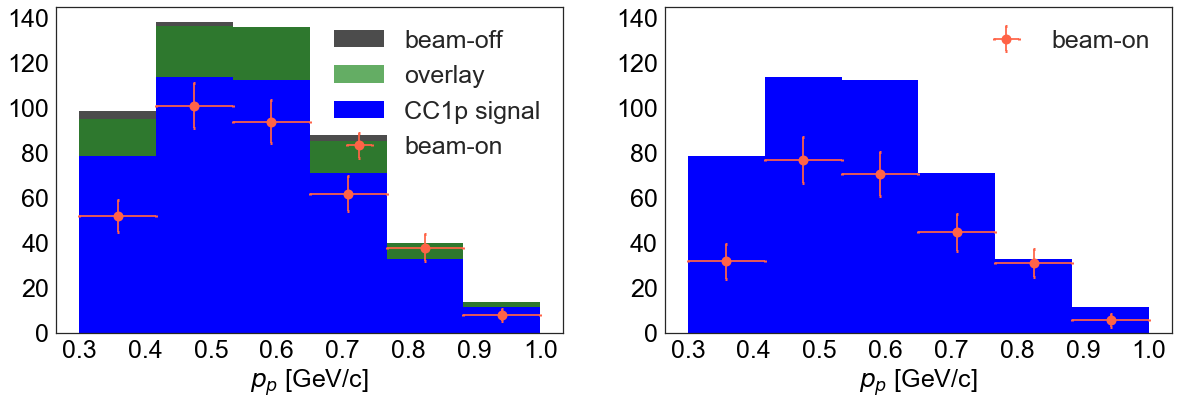

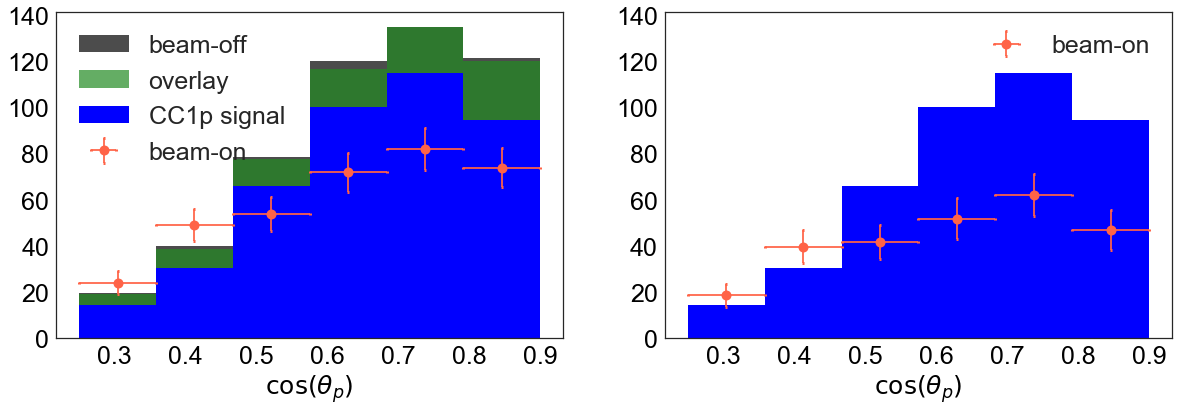

In [13]:
subtrsact_bkg_1d(selected_beam_off=selected_beam_off,selected_beam_on=selected_beam_on,selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p
                 ,bins=Bins['Pmu'],xlabel=Vlabels['Pmu']+' ['+Units['Pmu']+']',xvar='reco_Pmu_mcs')
subtrsact_bkg_1d(selected_beam_off=selected_beam_off,selected_beam_on=selected_beam_on,selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p
                 ,bins=Bins['cos(theta(mu))'],xlabel=Vlabels['cos(theta(mu))'],xvar='reco_Pmu_cos_theta')
subtrsact_bkg_1d(selected_beam_off=selected_beam_off,selected_beam_on=selected_beam_on,selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p
                 ,bins=Bins['Pp'],xlabel=Vlabels['Pp']+' ['+Units['Pp']+']',xvar='reco_Pp')
subtrsact_bkg_1d(selected_beam_off=selected_beam_off,selected_beam_on=selected_beam_on,selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p
                 ,bins=Bins['cos(theta(p))'],xlabel=Vlabels['cos(theta(p))'],xvar='reco_Pp_cos_theta')